In [1]:
import numpy as np

from tools.surface_code import generate_steane_circuit
from tools.error_models import add_noise, construct_basic_noise_model
from tools.analysis import count_logical_errors_using_MWPM, plot_diff_noise_level
from tools.helper import save_circuit_diagram


In [2]:
distance = 9
# First test the noiselesss generation of steane circuits 
circuit = generate_steane_circuit(distance=9)

save_circuit_diagram(circuit,"testing.svg")

print(count_logical_errors_using_MWPM(circuit,10))

0


In [3]:
distance = 3
noise_level = 0.10
num_shots = 100
circuit  = generate_steane_circuit(distance)
noisy_circ = add_noise(circuit, construct_basic_noise_model(noise_level))

save_circuit_diagram(noisy_circ,"noisy_test.svg")

print(count_logical_errors_using_MWPM(noisy_circ, num_shots))

18


/home/leo/Documents/MasterArbeit/code/new_start/tools/analysis.py:67: RuntimeWarning: divide by zero encountered in log
  y, x= clean_array(np.log(log_prob), np.log(noise))


<Figure size 640x480 with 0 Axes>

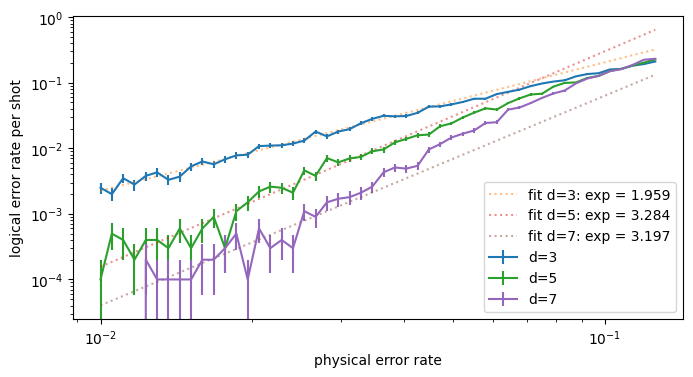

In [ ]:
distances = [3,5,7]
noise_set = np.logspace(-2,-0.9)
num_shots = 100_000

steane_circuits = [generate_steane_circuit(d) for d in distances]

plot_diff_noise_level(
    steane_circuits,
    construct_basic_noise_model,
    filename="basic_test",
    labels= ["d=" + str(d) for d in distances],
    noise_set= noise_set,
    num_shots=num_shots,
    fit_slopes = True,
    reference_lines = False,
)
